In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, pickle
import sys
from skimage import io
import os
sys.path.append("../../")


%load_ext autoreload
%autoreload 2
%matplotlib inline

### Generate training and test sets from the cellpose original dataset folders

In [2]:
def percentile_normalization(image,pmin=1,pmax=98,clip = False):
    # Normalize the image using percentiles
    lo, hi = np.percentile(image, (pmin, pmax))
    image_norm_percentile = (image - lo) / (hi - lo)
    
    if clip:
        image_norm_percentile[image_norm_percentile>1] = 1
        image_norm_percentile[image_norm_percentile<0] = 0
        
    return image_norm_percentile

In [67]:
data_train_dir = '/data/natalia/intern20/cellpose/cellpose_cytoplasmic_train/train/' 
data_test_dir = '/data/natalia/intern20/cellpose/cellpose_cytoplasmic_test/test/'


### Images from the train folder to be considered
list_train_files = ["057_img","097_img","035_img","102_img",
"092_img","043_img","048_img","068_img",
"021_img","017_img","020_img","014_img","095_img",
"039_img","086_img","003_img","032_img","096_img",
"079_img","045_img","118_img","088_img","006_img",
"085_img","024_img","005_img","008_img","034_img",
"013_img","076_img","028_img","044_img","041_img","117_img",
"099_img","050_img","080_img","002_img","036_img",
"071_img","037_img","065_img","031_img","019_img","022_img","018_img",
"033_img","101_img","027_img","000_img","063_img","016_img","070_img",
"029_img","030_img","004_img","042_img","009_img","052_img",
"056_img","083_img","001_img","011_img","073_img","077_img"]

### Images from the test folder to be considered
list_test_files = ["003_img","006_img","008_img","002_img",
"000_img","004_img","001_img",
"007_img","010_img"]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 000_img
[16.477041 21.535635]
[0.09796856 0.19279966]


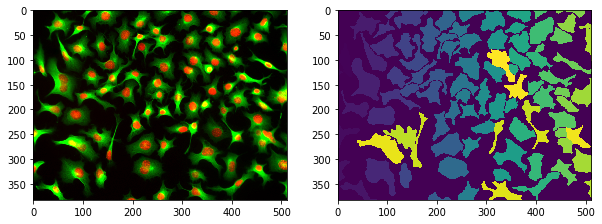

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 001_img
[ 7.6941857 12.538343 ]
[0.08263025 0.15514255]


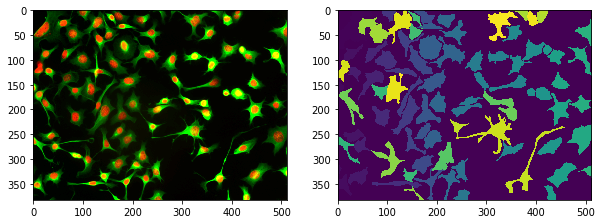

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 002_img
[13.600935 16.809568]
[0.0864057  0.18278645]


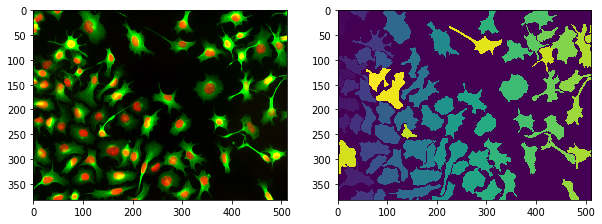

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 003_img
[11.685894 13.90138 ]
[0.07466514 0.16783838]


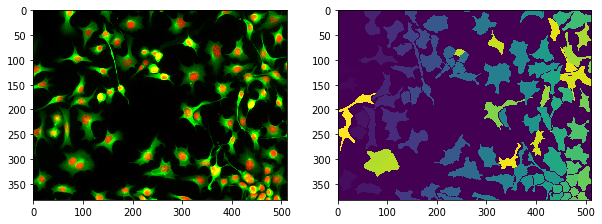

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 004_img
[11.22899  15.351231]
[0.0831277  0.17388165]


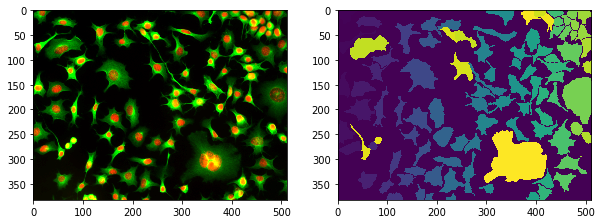

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 005_img
[15.05227  18.104383]
[0.10482398 0.18877652]


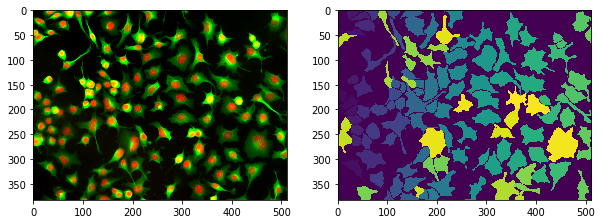

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 006_img
[16.098064 15.197368]
[0.13522235 0.18326405]


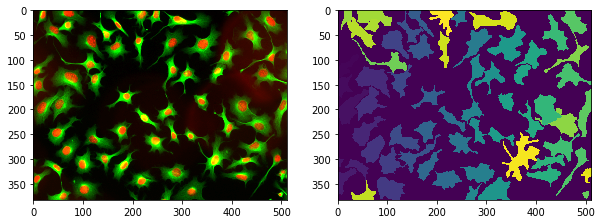

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 008_img
[ 9.7494545 14.975114 ]
[0.08129848 0.15553865]


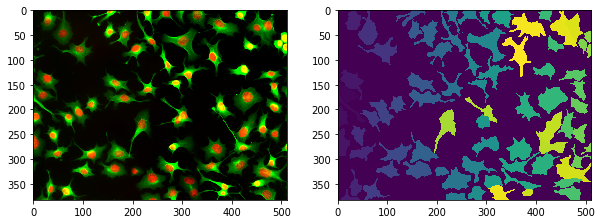

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 009_img
[18.91572  15.938158]
[0.13806714 0.23953447]


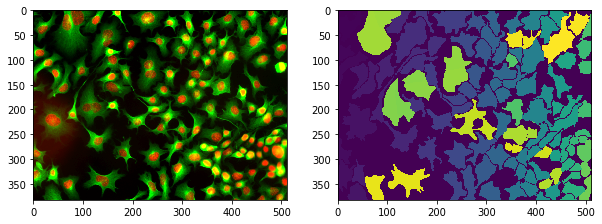

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 011_img
[12.167199 14.876805]
[0.08338268 0.15626799]


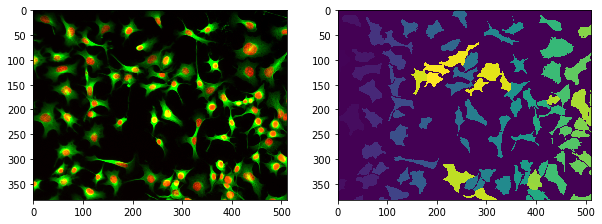

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 013_img
[13.552459 10.61684 ]
[0.07769591 0.15383114]


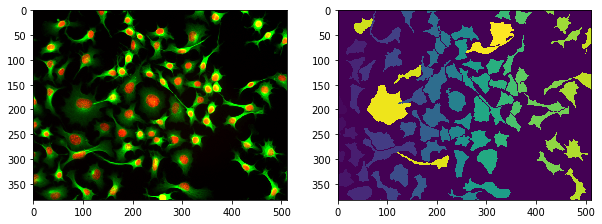

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 014_img
[13.178545 15.80659 ]
[0.07920901 0.18296668]


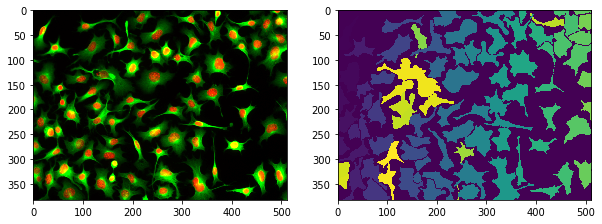

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 016_img
[ 9.751825  15.2616625]
[0.10073359 0.20721348]


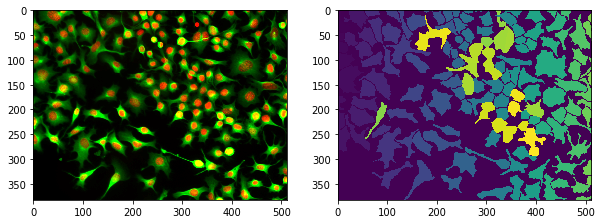

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 017_img
[10.129171 16.663736]
[0.08119607 0.16254795]


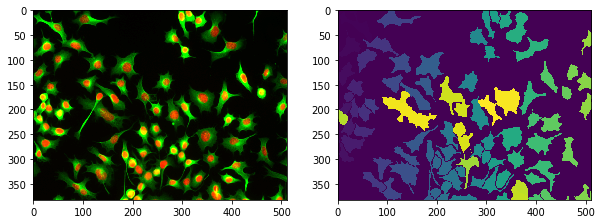

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 018_img
[13.896602 14.796615]
[0.07559235 0.14550309]


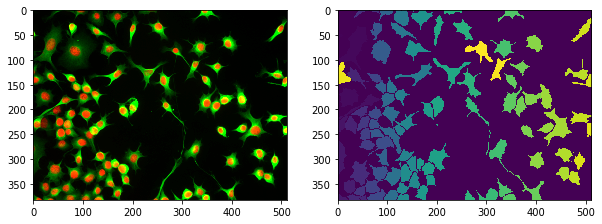

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 019_img
[15.01304  15.995762]
[0.09649279 0.17801997]


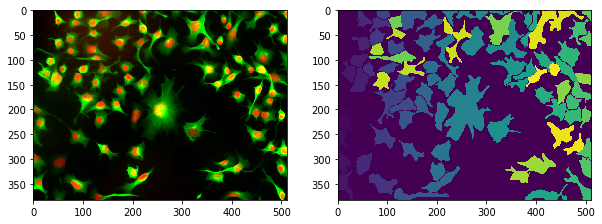

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 020_img
[16.450867 28.325657]
[0.11026586 0.23022181]


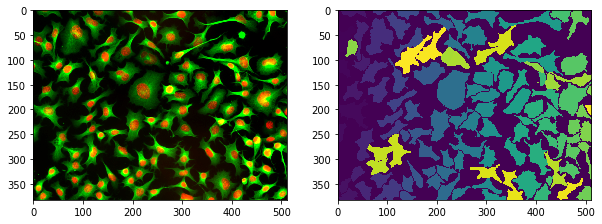

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 021_img
[14.869059 20.406128]
[0.11194934 0.21040638]


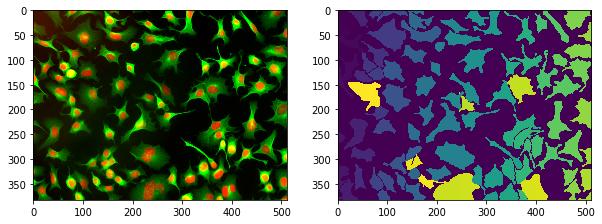

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 022_img
[19.99074   8.226904]
[0.063228   0.11318582]


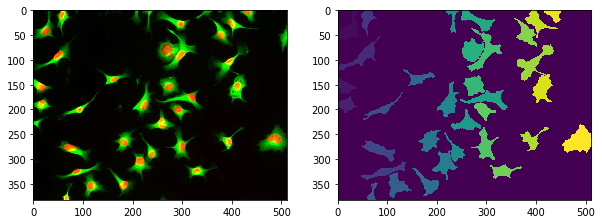

train 024_img
[14.682349 10.935501]
[0.07684897 0.12236275]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


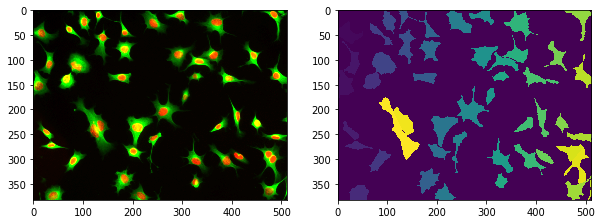

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 027_img
[19.088064 10.31867 ]
[0.08535675 0.14351596]


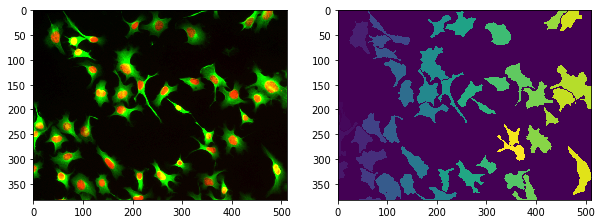

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 028_img
[13.321419   7.5337744]
[0.10314471 0.09880526]


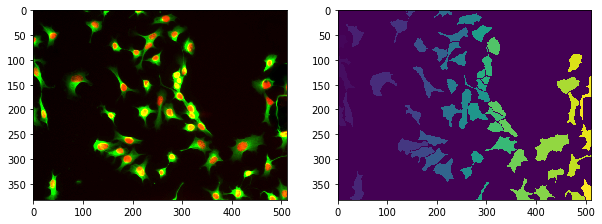

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 029_img
[18.7687  18.67834]
[0.08882307 0.1763226 ]


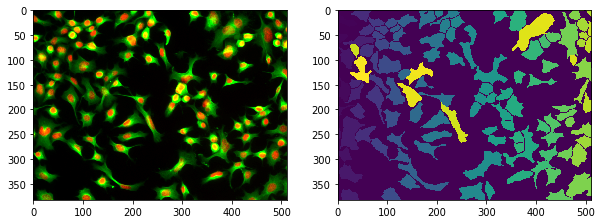

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 030_img
[15.412548 11.838442]
[0.0974235  0.15870209]


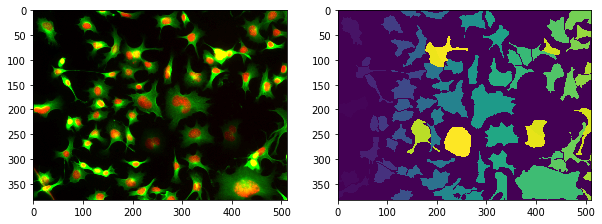

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 031_img
[23.069502  8.346677]
[0.07360054 0.10944986]


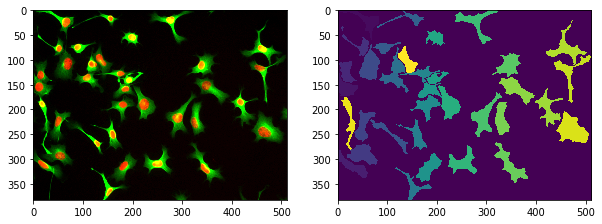

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 032_img
[15.957872 14.693772]
[0.10546298 0.16236432]


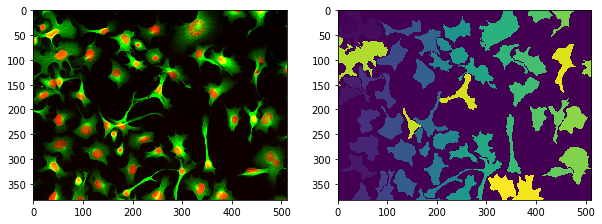

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 033_img
[16.76259  10.093011]
[0.09944744 0.14711039]


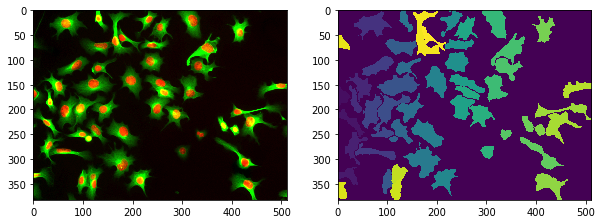

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 034_img
[29.182686  7.805228]
[0.08030153 0.11844751]


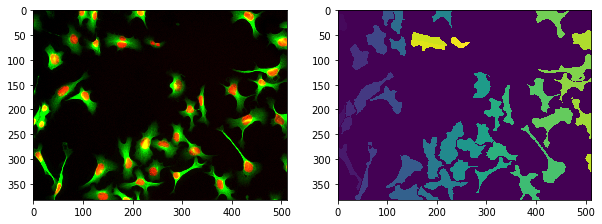

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 035_img
[14.035411   7.6005425]
[0.16721067 0.12729985]


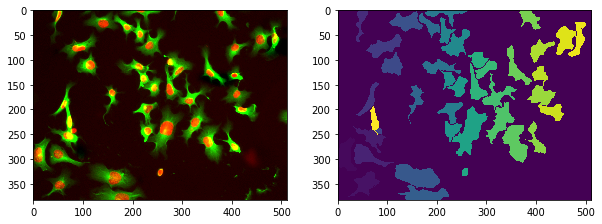

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 036_img
[22.899212  6.664486]
[0.08954237 0.11662814]


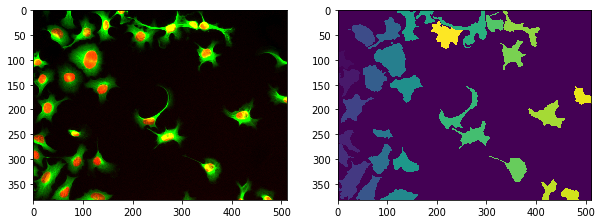

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 037_img
[22.305769  8.178897]
[0.12269629 0.14332417]


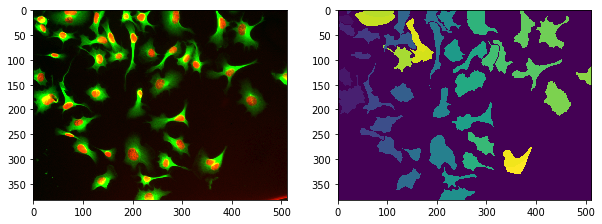

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 039_img
[11.389691 12.990663]
[0.08404357 0.13324468]


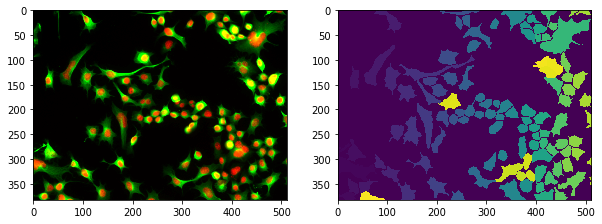

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 041_img
[10.399508 12.040042]
[0.06673459 0.14125066]


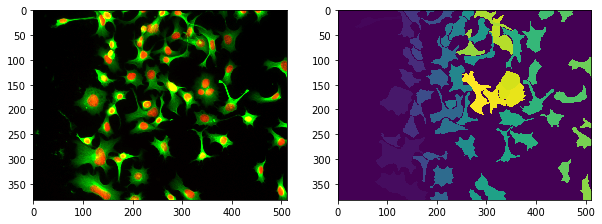

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 042_img
[11.674762 12.848901]
[0.07405373 0.14937624]


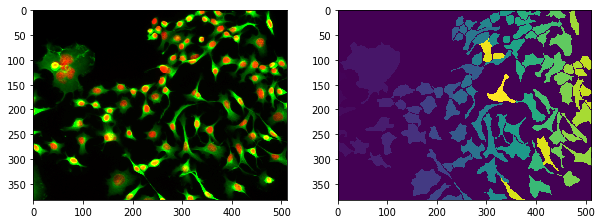

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 043_img
[10.917071 13.385311]
[0.09729838 0.19295283]


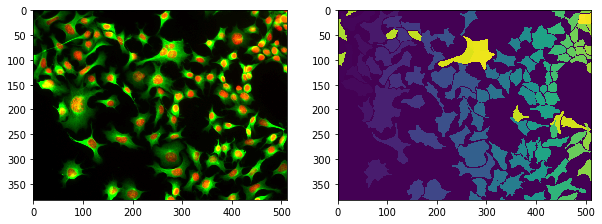

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 044_img
[13.016105 17.099354]
[0.06940296 0.14845236]


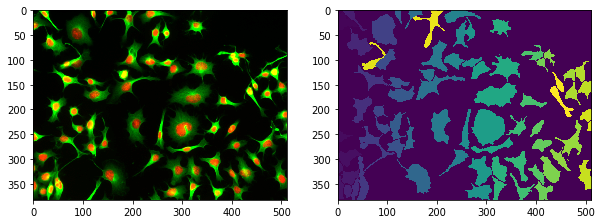

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 045_img
[10.579818  8.47645 ]
[0.06445684 0.11169901]


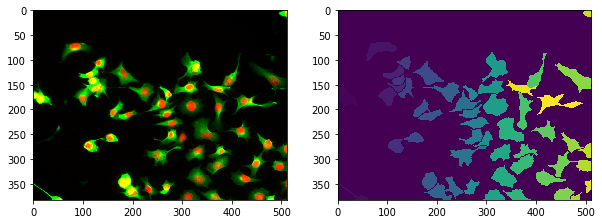

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 048_img
[10.257261  7.133353]
[0.0724784  0.07661523]


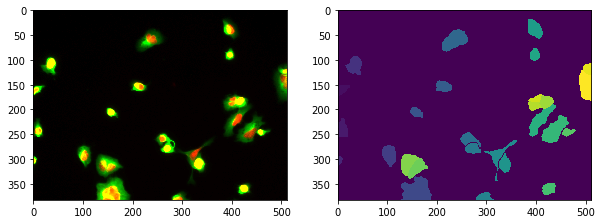

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 050_img
[8.542097  5.3059726]
[0.07700981 0.07686805]


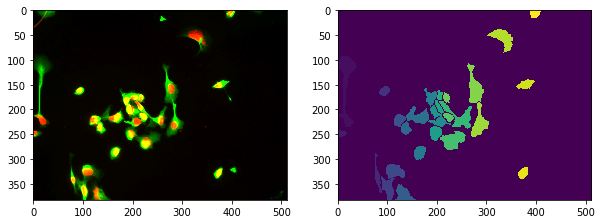

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 052_img
[13.030062  6.166898]
[0.08410441 0.0816896 ]


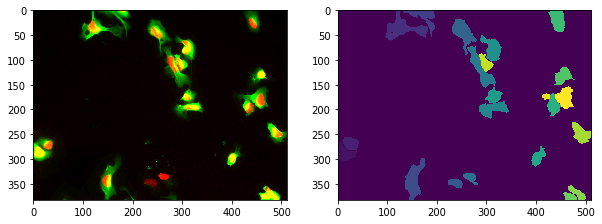

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 056_img
[13.116397   6.8219852]
[0.0643187  0.07973268]


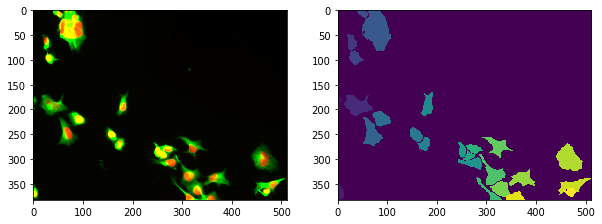

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 057_img
[13.692992   7.6379123]
[0.07695106 0.08197801]


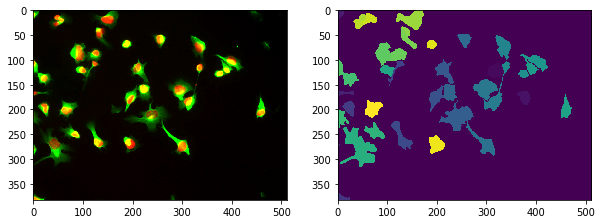

train 063_img
[12.151227  5.75972 ]
[0.10498434 0.06963052]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


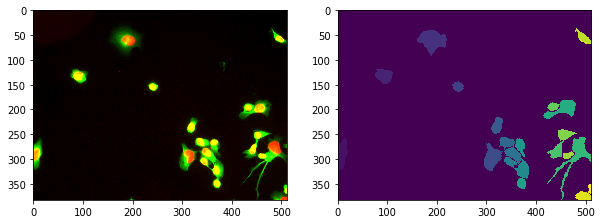

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 065_img
[7.7582765 9.909534 ]
[0.06367022 0.09528273]


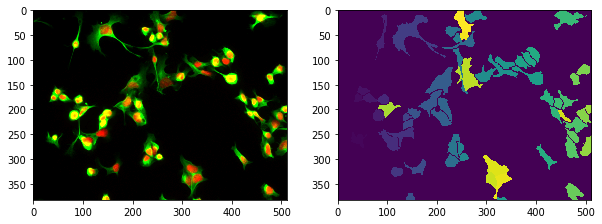

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 068_img
[15.046707   5.1554646]
[0.10122818 0.07999197]


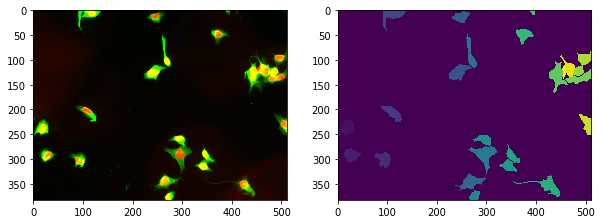

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 070_img
[13.622562  5.969923]
[0.10280186 0.07765505]


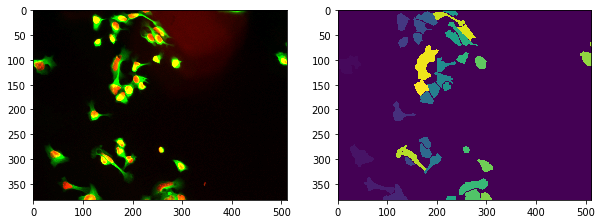

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 071_img
[18.222324  5.505365]
[0.09388407 0.07620645]


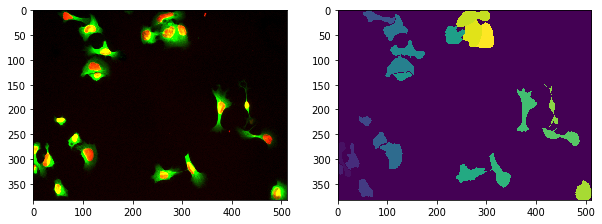

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 073_img
[13.548517  9.396454]
[0.08294845 0.11356573]


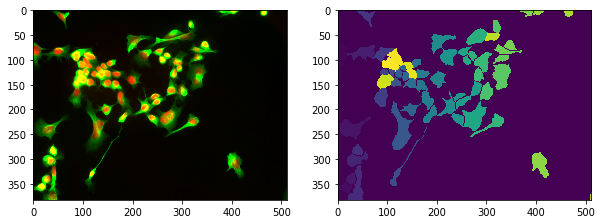

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 076_img
[12.1345415  6.9253683]
[0.07660568 0.08955389]


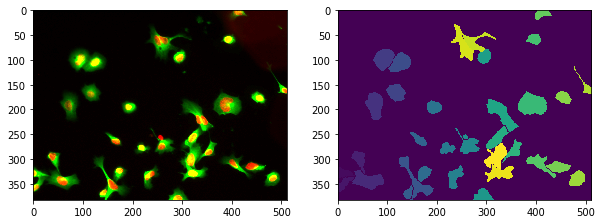

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 077_img
[22.032204   6.6013584]
[0.08995895 0.0852153 ]


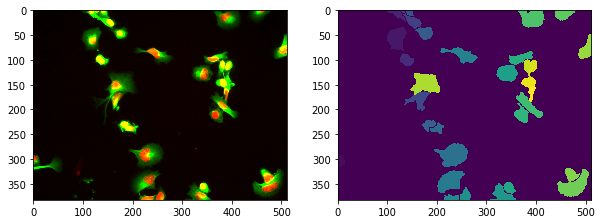

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 079_img
[13.756472  8.167372]
[0.07690369 0.11747198]


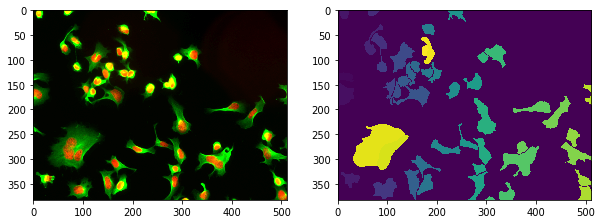

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 080_img
[18.460392  5.921712]
[0.06909073 0.10692755]


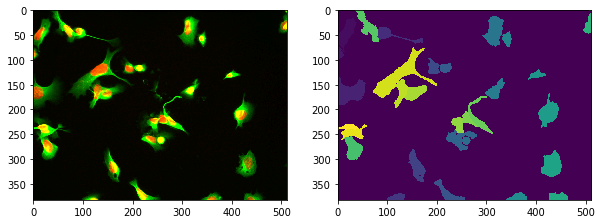

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 083_img
[16.901493   5.1300535]
[0.08315785 0.07789613]


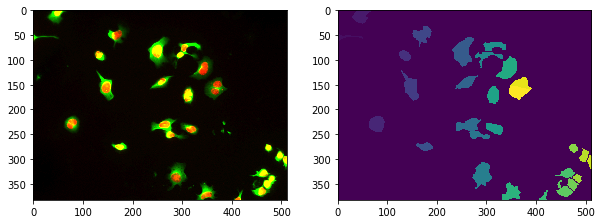

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 085_img
[11.297568   6.1510077]
[0.07169151 0.08832938]


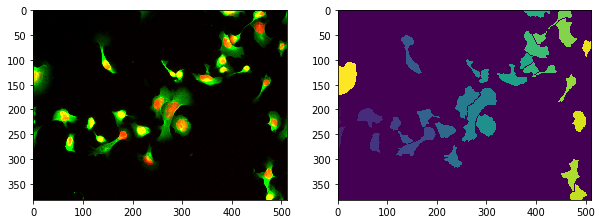

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 086_img
[15.079496   5.6428227]
[0.14060177 0.0791912 ]


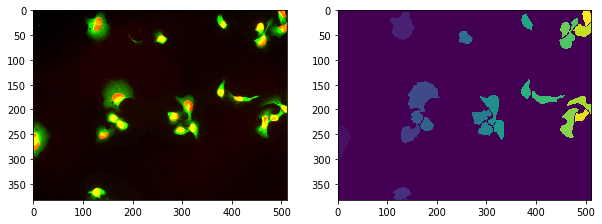

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 088_img
[12.11656    5.2131047]
[0.10746092 0.07473814]


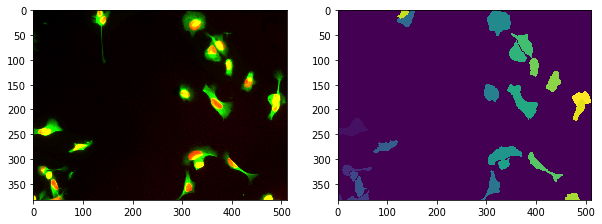

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 092_img
[ 9.930725 26.441637]
[0.08566999 0.18857394]


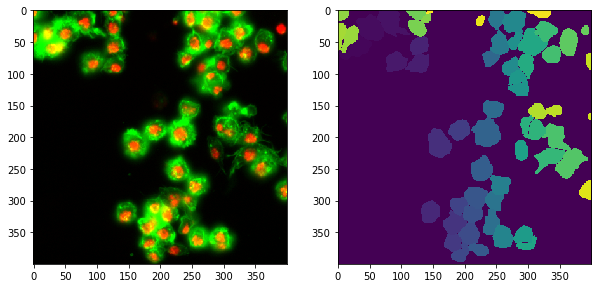

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 095_img
[11.222037 19.40227 ]
[0.08638405 0.15682887]


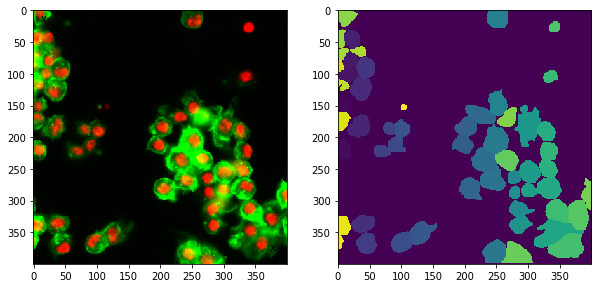

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 096_img
[18.97903 34.80968]
[0.1346558  0.29299265]


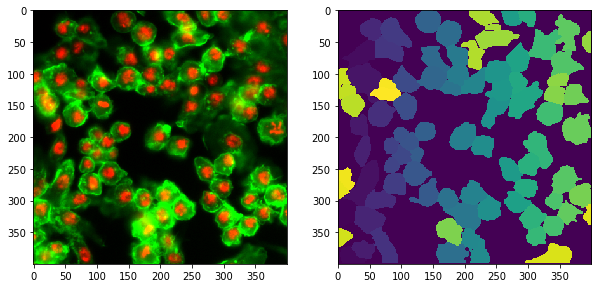

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 097_img
[22.197538 30.123188]
[0.13578506 0.22633068]


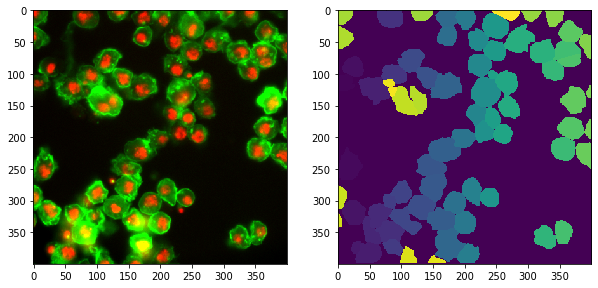

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 099_img
[20.463081 37.871426]
[0.12249599 0.23562928]


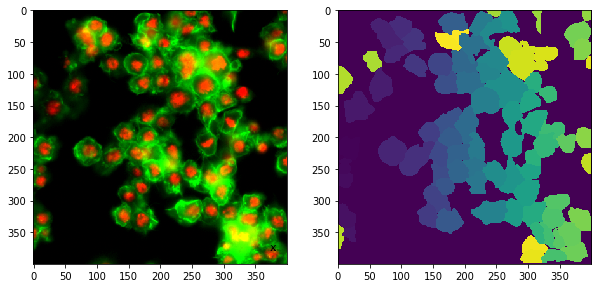

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 101_img
[12.316701 21.673767]
[0.11095016 0.19356684]


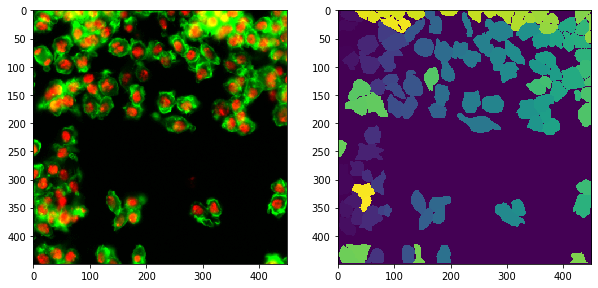

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 102_img
[20.073654 43.879097]
[0.1631363  0.30407304]


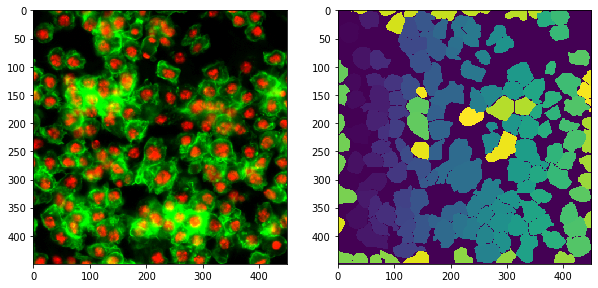

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 117_img
[12.401799 33.869564]
[0.08381739 0.20675284]


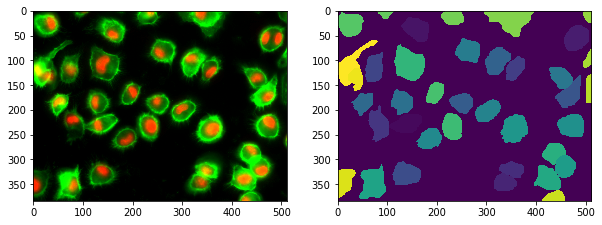

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train 118_img
[ 8.8758135 31.438334 ]
[0.0778827  0.19522458]


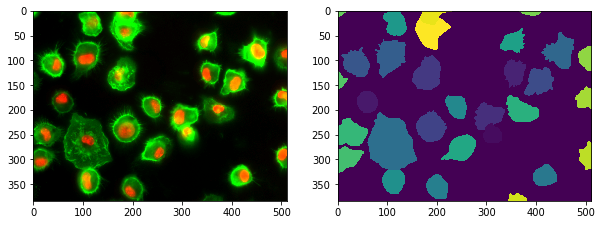

test 000_img
[ 9.897708 14.060027]
[0.08140375 0.14891405]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


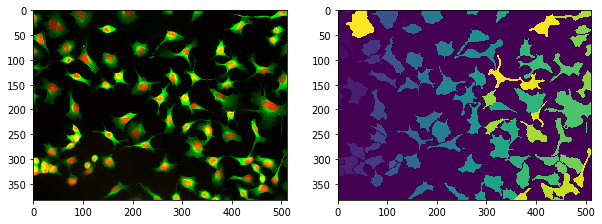

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


test 001_img
[13.464522 17.219189]
[0.07695939 0.15123364]


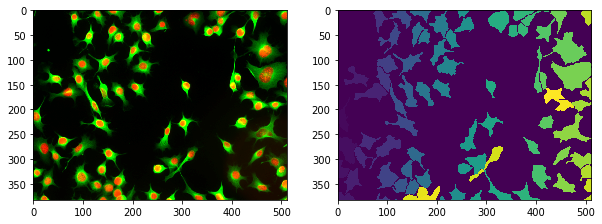

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


test 002_img
[14.664425 22.582598]
[0.0891252  0.21179584]


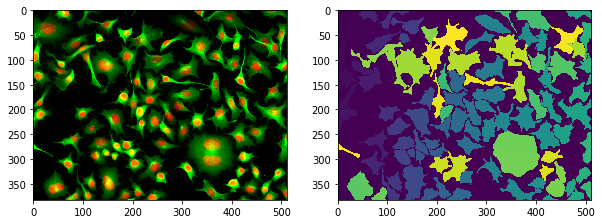

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


test 003_img
[19.964329 11.047772]
[0.09958968 0.15336679]


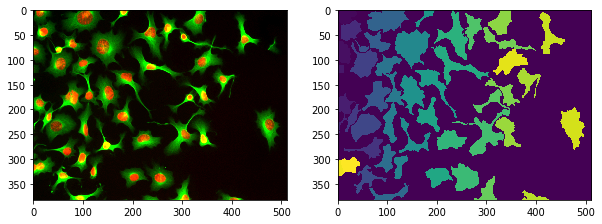

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


test 004_img
[6.9006557 6.190259 ]
[0.0725608  0.08958181]


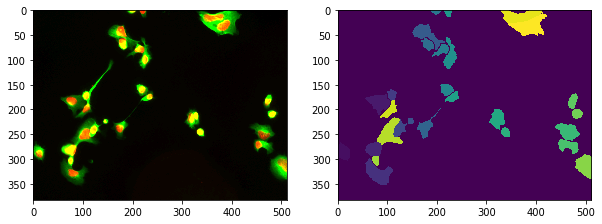

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


test 006_img
[8.908683 8.477577]
[0.07797027 0.09668803]


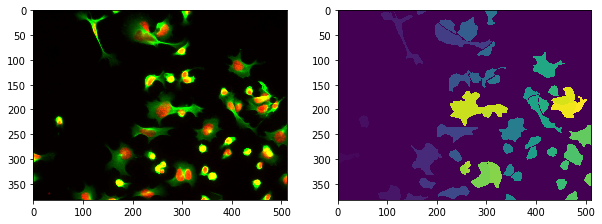

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


test 007_img
[10.215313   7.7562366]
[0.07058731 0.11283942]


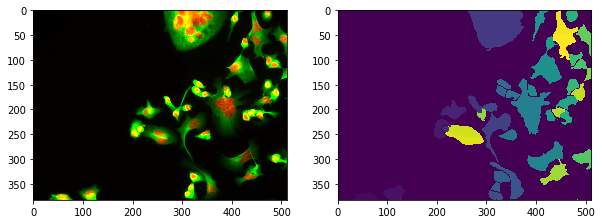

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


test 008_img
[11.125387  7.768914]
[0.08145956 0.11088593]


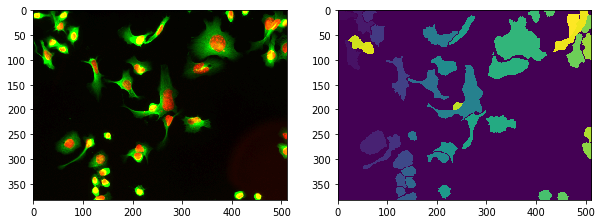

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


test 010_img
[9.974839 6.012693]
[0.07083443 0.07431345]


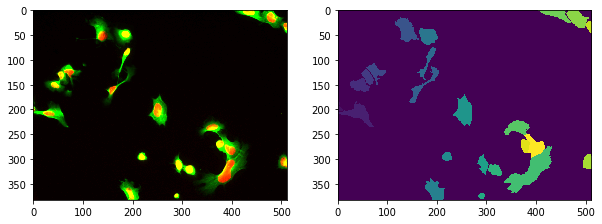

In [83]:
from general.utils import mkdir
save_dir = '/data/natalia/intern20/PaperData/cellpose/' ## This should be the folder where the .npz files will be saved
mkdir(save_dir)

### Images that will be considered as training
file_train_list = ['000_img','003_img','006_img','009_img','019_img',
                   '035_img','039_img','096_img','099_img','102_img']

row = []

dir_dic = {'train':list_train_files,'test':list_test_files}

for key in dir_dic.keys():
    
    data_dir = data_train_dir if key == 'train' else data_test_dir
    list_files = dir_dic[key]
    for file in np.unique(np.array(list_files)):
        print(key,file)
        if os.path.exists(data_dir+file+'.png'):
            im = np.array(io.imread(data_dir+file+'.png')[...,0:2]).astype('float32')
            mask_file = file.split('_')[0]
            im_nuclei = io.imread(data_dir+mask_file+'_masks.png')
        else:
            continue

        if (file in file_train_list) & (key == 'train'):
            group = 'train'
        else:
            group = 'test'
        row.append([file+'_cellpose_'+key+'_folder',save_dir,file+'_cellpose_'+key+'_folder.npz',group])

        w = [0,1000]
        h = [0,1000]

        ch_number = np.mean(im,axis = (0,1))
        print(ch_number)
        im[...,0] = percentile_normalization(im[...,0],pmin=1,pmax=98,clip = False)
        im[...,1] = percentile_normalization(im[...,1],pmin=1,pmax=98,clip = False)
        ch_number = np.mean(im,axis = (0,1))
        print(ch_number)

        ## Plot ##
        patch_plot = im[w[0]:w[1],h[0]:h[1],:]
        patch_plot = np.concatenate([patch_plot,np.zeros([patch_plot.shape[0],patch_plot.shape[1]])[...,np.newaxis]],axis = -1)

        nuclei_patch_plot = im_nuclei[w[0]:w[1],h[0]:h[1],...]

        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        plt.imshow(patch_plot)
        plt.subplot(1,2,2)
        plt.imshow(nuclei_patch_plot)
        plt.show()
        
        np.savez(save_dir+file+'_cellpose_'+key+'_folder.npz', image=im, label = im_nuclei) 

In [85]:
pd_files = pd.DataFrame(data=row,columns = ['prefix','input_dir','input_file','group'])
pd_files.to_csv(save_dir+'files.csv', index=0)

In [86]:
pd_files

prefix                                   input_dir  \
0   000_img_cellpose_train_folder  /data/natalia/intern20/PaperData/cellpose/   
1   001_img_cellpose_train_folder  /data/natalia/intern20/PaperData/cellpose/   
2   002_img_cellpose_train_folder  /data/natalia/intern20/PaperData/cellpose/   
3   003_img_cellpose_train_folder  /data/natalia/intern20/PaperData/cellpose/   
4   004_img_cellpose_train_folder  /data/natalia/intern20/PaperData/cellpose/   
..                            ...                                         ...   
69   004_img_cellpose_test_folder  /data/natalia/intern20/PaperData/cellpose/   
70   006_img_cellpose_test_folder  /data/natalia/intern20/PaperData/cellpose/   
71   007_img_cellpose_test_folder  /data/natalia/intern20/PaperData/cellpose/   
72   008_img_cellpose_test_folder  /data/natalia/intern20/PaperData/cellpose/   
73   010_img_cellpose_test_folder  /data/natalia/intern20/PaperData/cellpose/   

                           input_file  group  
0   000_img_cellpose_train_folder.npz  train  
1   001_img_cellpose_train_folder.npz   test  
2   002_img_cellpose_train_folder.npz   test  
3   003_img_cellpose_train_folder.npz  train  
4   004_img_cellpose_train_folder.npz   test  
..                                ...    ...  
69   004_img_cellpose_test_folder.npz   test  
70   006_img_cellpose_test_folder.npz   test  
71   007_img_cellpose_test_folder.npz   test  
72   008_img_cellpose_test_folder.npz   test  
73   010_img_cellpose_test_folder.npz   test  

[74 rows x 4 columns]